<a href="https://colab.research.google.com/github/cbraun18/Bio125physiology/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
dfr = pd.read_csv (r'./Chey Right Hand.txt', sep = '\t')
dfr

,Time,EMG,Muscle Force
0,0.000,0.000000,0.248007
1,0.001,0.000000,0.248377
2,0.002,0.000000,0.248747
3,0.003,0.000000,0.248747
4,0.004,0.000000,0.248007
...,...,...,...
61147,61.147,-0.216181,0.248007
61148,61.148,-0.064470,0.248007
61149,61.149,0.082500,0.248377
61150,61.150,0.150747,0.248377


In [31]:
dfl = pd.read_csv (r'./Chey Left Hand.txt', sep = '\t')
dfl

,Time,EMG,Muscle Force
0,0.000,0.000000,0.249858
1,0.001,0.000000,0.249858
2,0.002,0.000000,0.249858
3,0.003,0.000000,0.249858
4,0.004,0.000000,0.249858
...,...,...,...
114779,114.779,-0.030065,0.250229
114780,114.780,-0.035972,0.250229
114781,114.781,0.005170,0.250229
114782,114.782,0.017896,0.250229


Text(0, 0.5, 'EMG (Volts)')

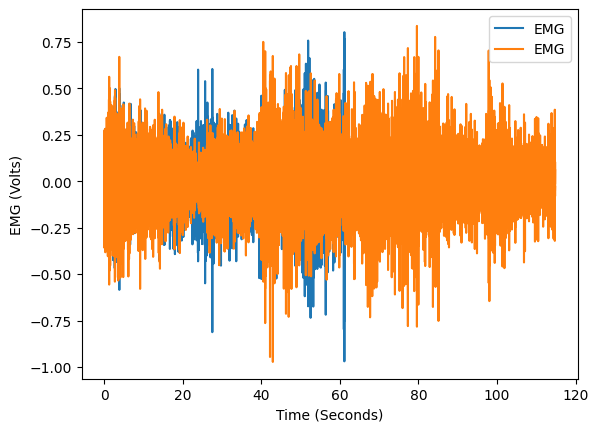

In [32]:
fig, ax = plt.subplots()
dfr.plot.line(ax = ax, y = 'EMG', x = 'Time')
dfl.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [33]:
# Define the parameters
window_size = 10  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10 # Step size in seconds (how often you want to check the window size)

In [34]:
# Initialize lists to store the calculated max values
max_values_r = []
time_intervals_r = []

max_values_l = []
time_intervals_l = []

# Iterate through the data in steps for dfr
for i in range(0, len(dfr), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfr):
        window_data = dfr.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_r.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_r.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfr
result_df_r = pd.DataFrame({'Time': time_intervals_r, 'MaxEMG_R': max_values_r})

# Iterate through the data in steps for dfl
for i in range(0, len(dfl), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfl):
        window_data = dfl.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_l.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_l.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfl
result_df_l = pd.DataFrame({'Time': time_intervals_l, 'MaxEMG_L': max_values_l})

# Calculate the percentage of max EMG for each 0.5 seconds interval for both dfr and dfl
result_df_r['MaxEMG_percent_R'] = (result_df_r['MaxEMG_R'] / result_df_r['MaxEMG_R'].max()) * 100
result_df_l['MaxEMG_percent_L'] = (result_df_l['MaxEMG_L'] / result_df_l['MaxEMG_L'].max()) * 100

# Display the results
print(result_df_r)
print(result_df_l)

      Time  MaxEMG_R  MaxEMG_percent_R
0   4.9995  0.499897         66.095178
1  14.9995  0.363255         48.028702
2  24.9995  0.603520         79.795962
3  34.9995  0.379170         50.132945
4  44.9995  0.566515         74.903250
5  54.9995  0.756329        100.000000
        Time  MaxEMG_L  MaxEMG_percent_L
0     4.9995  0.668744         80.078265
1    14.9995  0.478978         57.354873
2    24.9995  0.388237         46.489158
3    34.9995  0.379006         45.383798
4    44.9995  0.749312         89.725822
5    54.9995  0.580060         69.458864
6    64.9995  0.574911         68.842300
7    74.9995  0.835113        100.000000
8    84.9995  0.775894         92.908864
9    94.9995  0.702716         84.146217
10  104.9995  0.525651         62.943697


In [35]:
threshold = 60

In [36]:
reached_threshold_R = result_df_r[result_df_r['MaxEMG_percent_R'] <= threshold]
time_at_threshold_R = reached_threshold_R['Time'].iloc[0]
reached_threshold_L = result_df_l[result_df_l['MaxEMG_percent_L'] <= threshold]
time_at_threshold_L = reached_threshold_L['Time'].iloc[0]
print(f"Time at ~{threshold} % of max for right hand: {time_at_threshold_R} seconds")
print(f"Time at ~{threshold} % of max for left hand: {time_at_threshold_L} seconds")

Time at ~60 % of max for right hand: 14.9995 seconds
Time at ~60 % of max for left hand: 14.9995 seconds


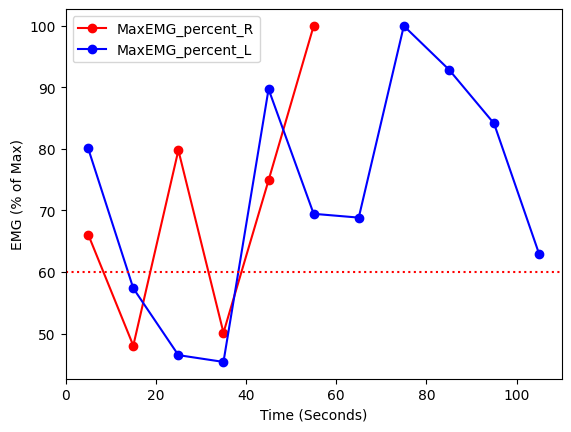

In [37]:
fig, ax = plt.subplots()
result_df_r.plot.line(ax = ax, y = 'MaxEMG_percent_R', x = 'Time', color = 'r', marker = 'o')
result_df_l.plot.line(ax = ax, y = 'MaxEMG_percent_L', x = 'Time', color = 'b', marker = 'o')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

Text(0.5, 1.0, 'Fatigability Assay - Right vs Left Hand')

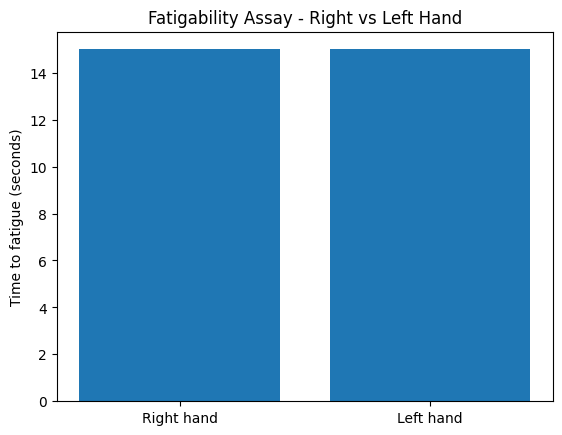

In [39]:
# build a bar plot
plt.bar(['Right hand', 'Left hand'],[time_at_threshold_R, time_at_threshold_L])
plt.ylabel('Time to fatigue (seconds)')
plt.title('Fatigability Assay - Right vs Left Hand')